<a href="https://colab.research.google.com/github/Gutawer/int_project/blob/Chloe/TestThatWorks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified


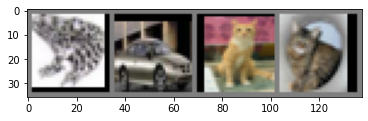

 frog   car   cat   cat
Using CUDA
[1,  2000] loss: 2.013
[1,  4000] loss: 1.817
[1,  6000] loss: 1.689
[1,  8000] loss: 1.599
[1, 10000] loss: 1.502
[1, 12000] loss: 1.436
[2,  2000] loss: 1.366
[2,  4000] loss: 1.307
[2,  6000] loss: 1.274
[2,  8000] loss: 1.229
[2, 10000] loss: 1.196
[2, 12000] loss: 1.170
[3,  2000] loss: 1.125
[3,  4000] loss: 1.108
[3,  6000] loss: 1.083
[3,  8000] loss: 1.067
[3, 10000] loss: 1.048
[3, 12000] loss: 1.037
[4,  2000] loss: 1.005
[4,  4000] loss: 0.971
[4,  6000] loss: 0.966
[4,  8000] loss: 0.944
[4, 10000] loss: 0.949
[4, 12000] loss: 0.942
[5,  2000] loss: 0.912
[5,  4000] loss: 0.915
[5,  6000] loss: 0.889
[5,  8000] loss: 0.883
[5, 10000] loss: 0.878
[5, 12000] loss: 0.867
[6,  2000] loss: 0.856
[6,  4000] loss: 0.846
[6,  6000] loss: 0.832
[6,  8000] loss: 0.839
[6, 10000] loss: 0.828
[6, 12000] loss: 0.799
[7,  2000] loss: 0.799
[7,  4000] loss: 0.782
[7,  6000] loss: 0.771
[7,  8000] loss: 0.774
[7, 10000] loss: 0.781
[7, 12000] loss: 0.779

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

#Change: Increase num_workers to 5 from 3
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

#Change: Redone layers to be in 5 parts
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2), #output = 64 * 16 *16
            nn.Dropout2d(p=0.2)
            
        )
        self.layer2 = torch.nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128,128,kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2), #output: 128 * 8 * 8
            nn.Dropout2d(p=0.3)
        
        )

        self.layer3 = torch.nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2, 2), #output: 256 x 4 x4
            nn.Dropout2d(p=0.4)
        )

        self.layer4 = torch.nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2, 2), #output should be: 512 * 2 * 2
            nn.Dropout2d(p=0.4)
        )


        self.lastLayer=torch.nn.Sequential(
            nn.Flatten(),
            nn.Linear(512*2*2, 1024),
            #nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
        #Values taken from: https://medium.com/swlh/image-classification-with-cnn-4f2a501faadb

    def forward(self, x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=self.layer4(x)
        x=self.lastLayer(x)
        return x


net = Net()
if torch.cuda.is_available():
    print("Using CUDA")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.0001)

for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)




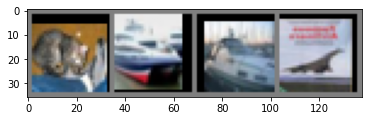

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship
Accuracy of the network on the 10000 test images: 82 %


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

#Changes to Original Code


Transforms: Preprocessed images differently using `RandomCrop` and `RandomFlip`

Layers: Added 3 extra layers of `Conv2d`, `ReLU` and `MaxPool`. Also included `Dropout(p=0.25)` to prevent overfitting and `BatchNorm2d`. Values taken from: https://medium.com/swlh/image-classification-with-cnn-4f2a501faadb

Optimizer: Changed optimizer to `Adam` algorithm as it was listed best by: https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6 and had high accuracy rates according to: jimaging-06-00092.pdf


